# Session 2 - Multi-Armed Bandits - Assignment

In this assignment you will apply different multi-armed bandit algorithms in order to discover the bandit with highest reward.
We'll start with deterministic bandits, meaning that the bandit rewards are not subject to any underlying stochastic process.
Next we'll focuss on stochastic bandits where the reward of a bandit is the result of a stochastic process and therefore making the discovery of the best bandit much harder.
Finally we will applay the MAB strategies to solve practical real-life problems.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Deterministic bandits
Assume you have to play 5 bandits with fixed rewards. These rewards are hidden and unknown when you start playing.
You can play the bandits 100 times. Find out how you can maximize your total reward over these 100 trials.

Use the BanditEnv_1 environment for this experiment.

In [2]:
##### Deterministic Bandit Environment

class BanditEnv_1:
    def __init__(self):
        self.rewards = [-10,6,8,0,-2]

    def reset(self):
        self.rewards = [-10,6,8,0,-2]

    def step(self,action):
        self.action = action
        return self.rewards[self.action]

In [3]:
# Create an Env1 object
Env1 = BanditEnv_1()
Env1.reset()

In [4]:
# Taken an action. For example choose bandit 0
reward = Env1.step(0)
print('reward =', reward)

reward = -10


If you know in advance that the bandits have fixed rewards, the best strategy will be to play them all once and then pick the one with the highest reward (greedy action).

[-10, 6, 8, 0, -2]
Bandit with the highest reward is bandit 2 with a reward of 8
The total reward =  710


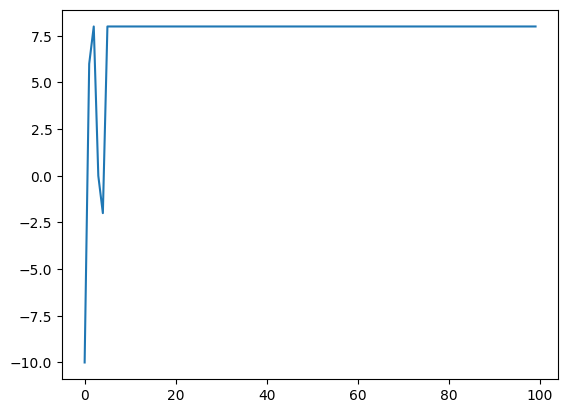

In [5]:
rewards = []
totalReward = 0
for action in range(5):
    rewards.append(Env1.step(action))
    totalReward = totalReward + reward

print(rewards)
bestAction = np.argmax(rewards)
print('Bandit with the highest reward is bandit',bestAction, 'with a reward of',rewards[bestAction])

for i in range(100 - 5):
    rewards.append(Env1.step(bestAction))
    totalReward = totalReward + Env1.step(bestAction)

print('The total reward = ', totalReward)

# Plot the rewards as a funtion of the number of trials
plt.plot(rewards)

##### 2. Stochastic bandits

In the case of stochastic bandits, the reward is sampled from an initially unknown distribution. Our task is to discover the expected reward of each of the bandits as quickly (and reliably) as possible.
As an example, assume that the reward of a bandit comes from a normal distribution with mean = 10 and standard deviation of 5. This means that in 68% procent of the trials this bandit will return a reward between 10-5 = 5 and 10+5 = 15. If you play this bandit multiple times, you can expect that the average reward will converge to 10.

Use BanditEnv_2 for this exercise. All 5 bandits have rewards coming from normal distributions with different means, but with the same standard deviation (std = 1).
You can play this bandit 200 times. Try to come up with a good strategy to maximize the total reward over these 200 trials.

In [6]:
class BanditEnv_2:
    def __init__(self):
        self.means = [-10,6,8,0,-2]
        self.std = 1

    def reset(self):
        self.means = [-10,6,8,0,-2]
        self.std = 1

    def step(self,action):
        self.action = action
        return np.random.normal(self.means[self.action], self.std, 1)[0]

In [7]:
# Create an Env2 object
Env2 = BanditEnv_2()
Env2.reset()
print(Env2.means)

[-10, 6, 8, 0, -2]


### 2.1 Epsilon Greedy

1. Implement the epsilon greedy algorithm to play the Env2 bandits.
2. Show the influence of epsilon parameter. Do this by plotting the reward history for different values of epsilon. Also visualize how often a bandit was chosen.
3. Find the optimal epsilon value giving you maximum total reward.
4. Use epsilon decay. This means that you gradually decrease the value of epsilon as the number of trials increases. Use the following rule: $\epsilon(t+1) = \eta \times \epsilon(t) $ where $0< \eta < 1$
5. Now test for different values of the standard deviation. What if the standard deviation becomes larger?

EXPLANATION :


The Epsilon-Greedy Algorithm balances between exploring new bandits and exploiting the best-known bandit. With a probability ϵ, the algorithm selects a random bandit (exploration), and with a probability 1-ϵ, it selects the bandit with the highest estimated reward (exploitation).

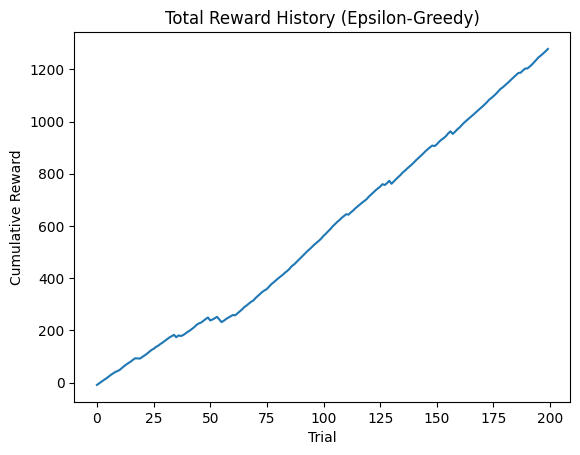

In [12]:
# epsilon greedy


# 1. Implement the epsilon greedy algorithm to play the Env2 bandits.


# Stochastic Bandit Environment for Epsilon-Greedy
class BanditEnv_2:
    def __init__(self):
        self.means = [-10, 6, 8, 0, -2]  # Mean rewards for each bandit
        self.std = 1  # Standard deviation for the rewards

    def reset(self):
        self.means = [-10, 6, 8, 0, -2]
        self.std = 1

    def step(self, action):
        # Sample a reward from a normal distribution for the chosen bandit
        return np.random.normal(self.means[action], self.std, 1)[0]

# Epsilon-Greedy Algorithm
def epsilon_greedy_bandit(env, num_trials, epsilon):
    num_bandits = len(env.means)
    estimated_rewards = np.zeros(num_bandits)  # Initialize estimated rewards for each bandit
    selection_counts = np.zeros(num_bandits)  # Count how many times each bandit is chosen
    total_rewards = []

    for t in range(num_trials):
        if np.random.rand() < epsilon:
            # Exploration: randomly choose a bandit
            action = np.random.randint(0, num_bandits)
        else:
            # Exploitation: choose the bandit with the highest estimated reward
            action = np.argmax(estimated_rewards)

        # Get the reward from the environment
        reward = env.step(action)

        # Update the count of selections for this bandit
        selection_counts[action] += 1

        # Update the estimated reward for this bandit using incremental average
        n = selection_counts[action]
        estimated_rewards[action] += (reward - estimated_rewards[action]) / n

        total_rewards.append(reward)

    return total_rewards, estimated_rewards, selection_counts

# Run the algorithm with epsilon = 0.1
env2 = BanditEnv_2()
env2.reset()

num_trials = 200
epsilon = 0.1  # Exploration rate
total_rewards_epsilon, estimated_rewards_epsilon, selection_counts_epsilon = epsilon_greedy_bandit(env2, num_trials, epsilon)

# Plot the cumulative reward history
plt.plot(np.cumsum(total_rewards_epsilon))
plt.title('Total Reward History (Epsilon-Greedy)')
plt.xlabel('Trial')
plt.ylabel('Cumulative Reward')
plt.show()





Explanation:

    # This code initializes a stochastic bandit environment where each bandit’s reward is drawn from a normal distribution.
    # The epsilon-greedy algorithm balances exploration and exploitation. With a 10% exploration rate (ϵ=0.1ϵ=0.1), it randomly selects a bandit 10% of the time.
    # The total reward is calculated and plotted as a cumulative reward over the trials.


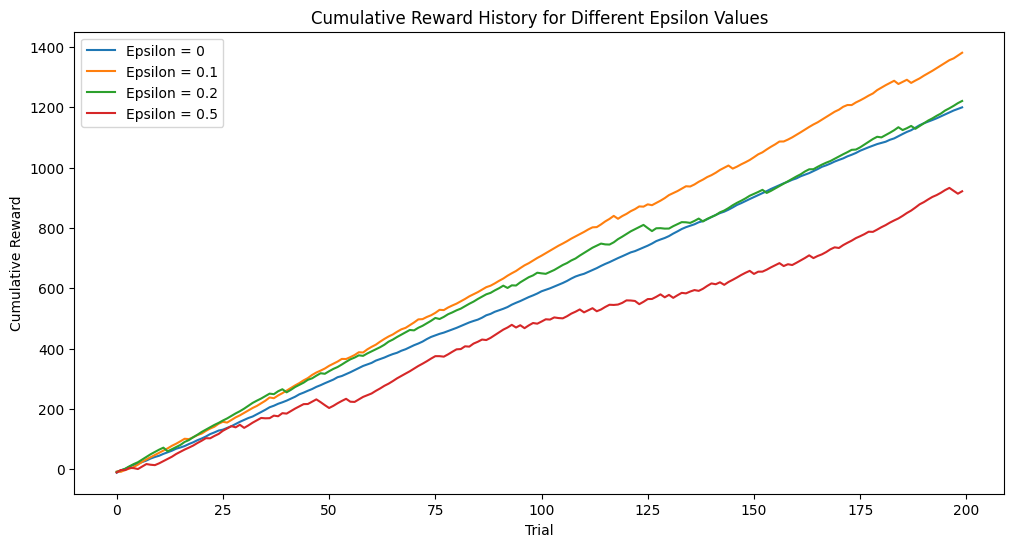

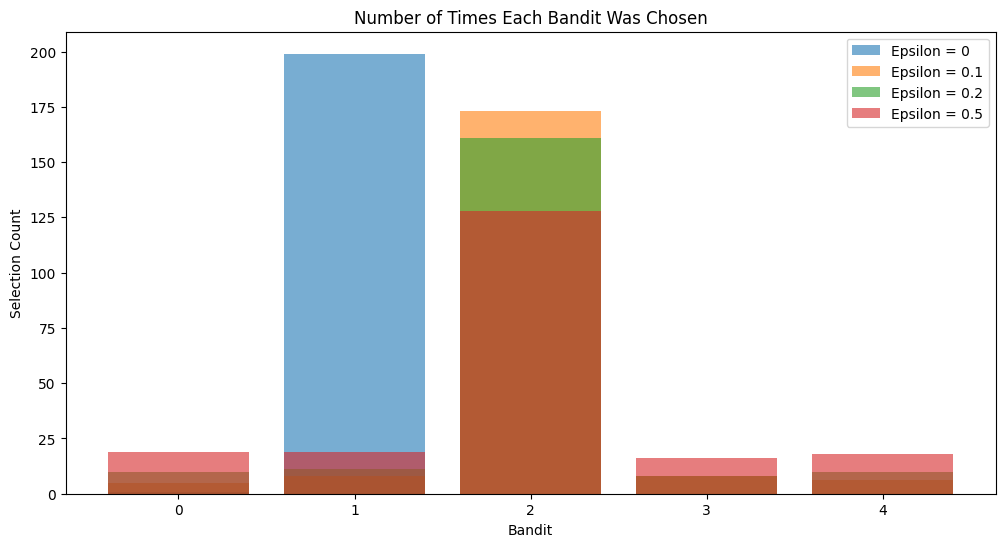

In [13]:
# 2. Show the influence of epsilon parameter. Do this by plotting the reward history for different values of epsilon.
#  Also visualize how often a bandit was chosen.


# Function to run Epsilon-Greedy with different epsilon values
def test_epsilon_values(env, epsilon_values, num_trials):
    cumulative_rewards = []
    selection_counts_list = []

    for epsilon in epsilon_values:
        env.reset()
        total_rewards, _, selection_counts = epsilon_greedy_bandit(env, num_trials, epsilon)
        cumulative_rewards.append(np.cumsum(total_rewards))
        selection_counts_list.append(selection_counts)

    return cumulative_rewards, selection_counts_list

# Test different epsilon values
epsilon_values = [0, 0.1, 0.2, 0.5]
cumulative_rewards, selection_counts_list = test_epsilon_values(env2, epsilon_values, num_trials)

# Plot reward history for different epsilon values
plt.figure(figsize=(12, 6))
for i, epsilon in enumerate(epsilon_values):
    plt.plot(cumulative_rewards[i], label=f'Epsilon = {epsilon}')
plt.title('Cumulative Reward History for Different Epsilon Values')
plt.xlabel('Trial')
plt.ylabel('Cumulative Reward')
plt.legend()
plt.show()

# Plot how often each bandit was chosen for different epsilon values
plt.figure(figsize=(12, 6))
for i, epsilon in enumerate(epsilon_values):
    plt.bar(range(len(env2.means)), selection_counts_list[i], alpha=0.6, label=f'Epsilon = {epsilon}')
plt.title('Number of Times Each Bandit Was Chosen')
plt.xlabel('Bandit')
plt.ylabel('Selection Count')
plt.legend()
plt.show()



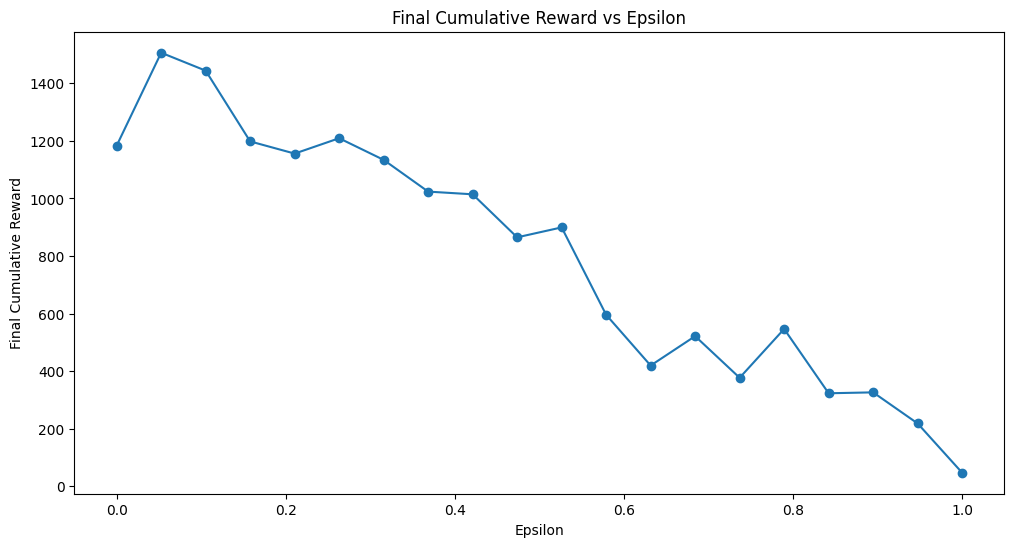

The optimal epsilon value is 0.05


In [14]:
# 3. Find the optimal epsilon value giving you maximum total reward.


# Find the optimal epsilon by testing a range of epsilon values
epsilon_range = np.linspace(0, 1, 20)  # Epsilon values from 0 to 1
final_cumulative_rewards = []

for epsilon in epsilon_range:
    env2.reset()
    total_rewards, _, _ = epsilon_greedy_bandit(env2, num_trials, epsilon)
    final_cumulative_rewards.append(np.sum(total_rewards))

# Plot the final cumulative reward vs epsilon
plt.figure(figsize=(12, 6))
plt.plot(epsilon_range, final_cumulative_rewards, marker='o')
plt.title('Final Cumulative Reward vs Epsilon')
plt.xlabel('Epsilon')
plt.ylabel('Final Cumulative Reward')
plt.show()

# Find the epsilon that gives the highest reward
optimal_epsilon = epsilon_range[np.argmax(final_cumulative_rewards)]
print(f'The optimal epsilon value is {optimal_epsilon:.2f}')



#### 4. Use epsilon decay. This means that you gradually decrease the value of epsilon as the number of trials increases.


Use the following rule:


 $\epsilon(t+1) = \eta \times \epsilon(t) $ where $0< \eta < 1$

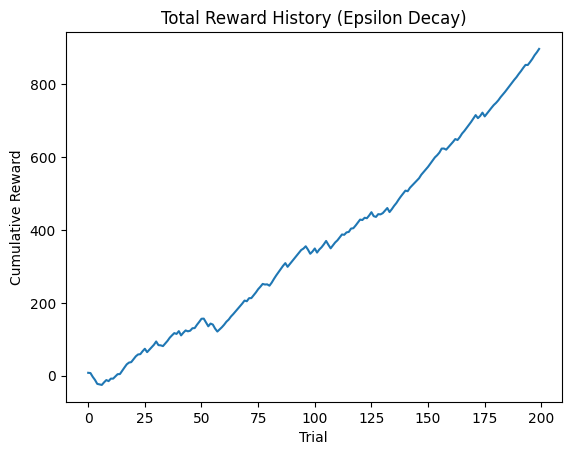

In [15]:
# Epsilon-Greedy with Epsilon Decay
def epsilon_greedy_decay_bandit(env, num_trials, initial_epsilon, eta):
    num_bandits = len(env.means)
    epsilon = initial_epsilon
    estimated_rewards = np.zeros(num_bandits)
    selection_counts = np.zeros(num_bandits)
    total_rewards = []

    for t in range(num_trials):
        if np.random.rand() < epsilon:
            # Exploration: randomly choose a bandit
            action = np.random.randint(0, num_bandits)
        else:
            # Exploitation: choose the bandit with the highest estimated reward
            action = np.argmax(estimated_rewards)

        # Get the reward from the environment
        reward = env.step(action)

        # Update the count of selections for this bandit
        selection_counts[action] += 1

        # Update the estimated reward for this bandit using incremental average
        n = selection_counts[action]
        estimated_rewards[action] += (reward - estimated_rewards[action]) / n

        # Decay epsilon after each trial
        epsilon *= eta

        total_rewards.append(reward)

    return total_rewards, estimated_rewards, selection_counts

# Run the epsilon decay algorithm
initial_epsilon = 1.0
eta = 0.99  # Decay rate
total_rewards_decay, _, _ = epsilon_greedy_decay_bandit(env2, num_trials, initial_epsilon, eta)

# Plot the cumulative reward history for epsilon decay
plt.plot(np.cumsum(total_rewards_decay))
plt.title('Total Reward History (Epsilon Decay)')
plt.xlabel('Trial')
plt.ylabel('Cumulative Reward')
plt.show()


#### 5. Now test for different values of the standard deviation. What if the standard deviation becomes larger?


If the standard deviation is low, rewards will cluster around the mean, making it easier to distinguish between good and bad bandits.


If the standard deviation is high, rewards will be more spread out, making it harder to differentiate between bandits over a small number of trials.

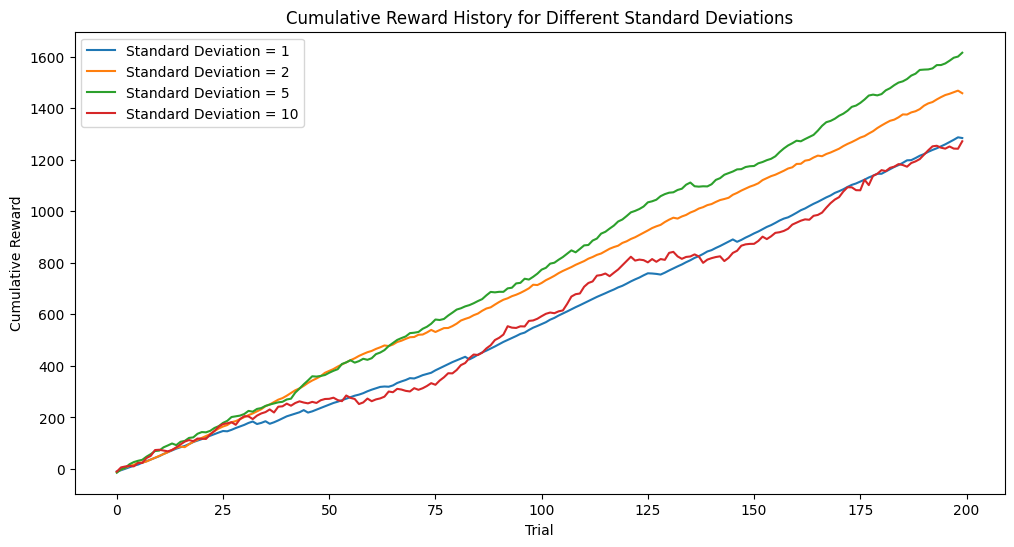

In [16]:
# Modify the environment to accept different standard deviations
class BanditEnv_2_VarStd:
    def __init__(self, std):
        self.means = [-10, 6, 8, 0, -2]  # Mean rewards for each bandit
        self.std = std  # Set the provided standard deviation

    def reset(self):
        self.means = [-10, 6, 8, 0, -2]

    def step(self, action):
        # Sample a reward from a normal distribution with the given standard deviation
        return np.random.normal(self.means[action], self.std, 1)[0]

# Test the epsilon-greedy algorithm with different standard deviations
def test_different_std(std_values, num_trials, epsilon):
    cumulative_rewards = []

    for std in std_values:
        # Create an environment with the given standard deviation
        env_var_std = BanditEnv_2_VarStd(std)
        env_var_std.reset()

        # Run the epsilon-greedy algorithm
        total_rewards, _, _ = epsilon_greedy_bandit(env_var_std, num_trials, epsilon)

        # Store the cumulative reward for this standard deviation
        cumulative_rewards.append(np.cumsum(total_rewards))

    return cumulative_rewards

# Set up parameters
std_values = [1, 2, 5, 10]  # Test different standard deviation values
num_trials = 200
epsilon = 0.1  # Fixed epsilon for exploration

# Run the test
cumulative_rewards_std = test_different_std(std_values, num_trials, epsilon)

# Plot the cumulative reward histories for different standard deviations
plt.figure(figsize=(12, 6))
for i, std in enumerate(std_values):
    plt.plot(cumulative_rewards_std[i], label=f'Standard Deviation = {std}')
plt.title('Cumulative Reward History for Different Standard Deviations')
plt.xlabel('Trial')
plt.ylabel('Cumulative Reward')
plt.legend()
plt.show()


### 2.2 Optimistic Initial Value

Continue to work with the Env2 environment.
Implement the Optimistic Initial Value algorithm. Start by initializing the estimated bandit means to a high non-zero value and use a greedy approach.
After each play the estimated bandit mean will come closer to the true bandit mean.

1. Implement the optimistic initial value algorithm to play the Env2 bandits. Check the final values of the estimated means.
2. Show the initialization. What happens if you initialize the estimated means to larger values?
3. Now test for different values of the standard deviation. What if the standard deviation becomes larger?
4. Compare the optimistic initial value approach to the epsilon greedy approach. Plot the reward history of both in one graph.



###1. Implement the optimistic initial value algorithm to play the Env2 bandits. Check the final values of the estimated means.


In the Optimistic Initial Value algorithm, we encourage exploration by initially assigning high values to the estimated rewards of each bandit. The idea is that since the estimated rewards are optimistic, the algorithm will be forced to explore each bandit to correct the overly optimistic estimates.
How It Works:

**Initialization**:

Set the estimated means (rewards) of each bandit to a high value, even though we haven't played any bandits yet.


**Greedy Approach:**


Always select the bandit with the highest estimated reward (no exploration). Since the initial estimates are optimistic, the algorithm will explore each bandit at least once, correcting the estimates over time.


**Updating:**

After each play, update the estimated reward for the chosen bandit using an incremental average.

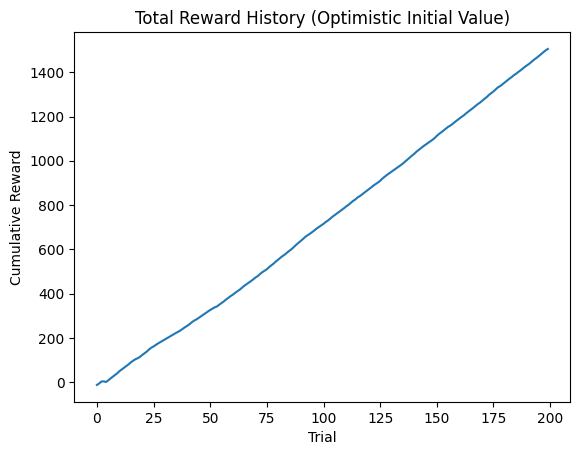

Final estimated means: [-12   4   5   0  -2]


In [17]:
# Optimistic initial value

# Optimistic Initial Value Strategy
def optimistic_initial_value_bandit(env, num_trials, initial_value):
    num_bandits = len(env.means)
    estimated_rewards = np.full(num_bandits, initial_value)  # Initialize with optimistic values
    selection_counts = np.zeros(num_bandits)  # Count how many times each bandit is selected
    total_rewards = []

    for t in range(num_trials):
        # Exploit the bandit with the highest estimated reward (all estimates start high)
        action = np.argmax(estimated_rewards)

        # Get the reward from the environment
        reward = env.step(action)

        # Update the count of selections for this bandit
        selection_counts[action] += 1

        # Update the estimated reward for this bandit using incremental average
        n = selection_counts[action]
        estimated_rewards[action] += (reward - estimated_rewards[action]) / n

        total_rewards.append(reward)

    return total_rewards, estimated_rewards, selection_counts

# Initialize the environment
env2 = BanditEnv_2()
env2.reset()

# Set the number of trials and the optimistic initial value
num_trials = 200
initial_value = 10  # Start with optimistic estimates

# Run the Optimistic Initial Value algorithm
total_rewards_optimistic, estimated_rewards_optimistic, selection_counts_optimistic = optimistic_initial_value_bandit(env2, num_trials, initial_value)

# Plot the total reward history
plt.plot(np.cumsum(total_rewards_optimistic))
plt.title('Total Reward History (Optimistic Initial Value)')
plt.xlabel('Trial')
plt.ylabel('Cumulative Reward')
plt.show()

# Check the final values of the estimated means
print(f'Final estimated means: {estimated_rewards_optimistic}')



### 2. Show the initialization. What happens if you initialize the estimated means to larger values?


In the Optimistic Initial Value strategy, the initial values assigned to the estimated rewards of each bandit play a critical role in how the algorithm explores the environment. By setting the initial values high, the algorithm is forced to explore each bandit at least once, as their estimated rewards start optimistic.

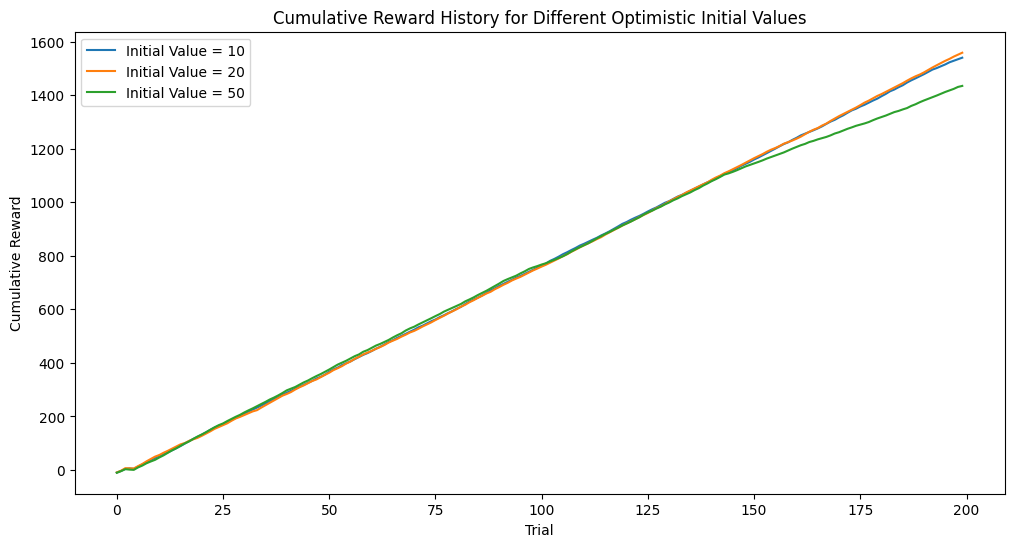

Final estimated means for Initial Value 10: [-9  5  5  2 -2]
Final estimated means for Initial Value 20: [-8  4  5  0  0]
Final estimated means for Initial Value 50: [-10   3   4  -1   0]


In [18]:
# Show the initialization and test different initial values

def optimistic_initial_value_test(env, num_trials, initial_values):
    cumulative_rewards_list = []
    estimated_rewards_list = []

    for initial_value in initial_values:
        env.reset()  # Reset the environment for each test
        total_rewards, estimated_rewards, _ = optimistic_initial_value_bandit(env, num_trials, initial_value)
        cumulative_rewards_list.append(np.cumsum(total_rewards))
        estimated_rewards_list.append(estimated_rewards)

    return cumulative_rewards_list, estimated_rewards_list

# Test different optimistic initial values
initial_values = [10, 20, 50]  # Test large initial values
cumulative_rewards_list, estimated_rewards_list = optimistic_initial_value_test(env2, num_trials, initial_values)

# Plot the cumulative reward histories for different initial values
plt.figure(figsize=(12, 6))
for i, initial_value in enumerate(initial_values):
    plt.plot(cumulative_rewards_list[i], label=f'Initial Value = {initial_value}')
plt.title('Cumulative Reward History for Different Optimistic Initial Values')
plt.xlabel('Trial')
plt.ylabel('Cumulative Reward')
plt.legend()
plt.show()

# Show the estimated rewards at the end for each initial value
for i, initial_value in enumerate(initial_values):
    print(f"Final estimated means for Initial Value {initial_value}: {estimated_rewards_list[i]}")


###3. Now test for different values of the standard deviation. What if the standard deviation becomes larger?




The standard deviation (σσ) controls the noise or uncertainty in the rewards. A larger standard deviation means that the rewards for each bandit will fluctuate more, making it harder for the algorithm to estimate the true mean reward.



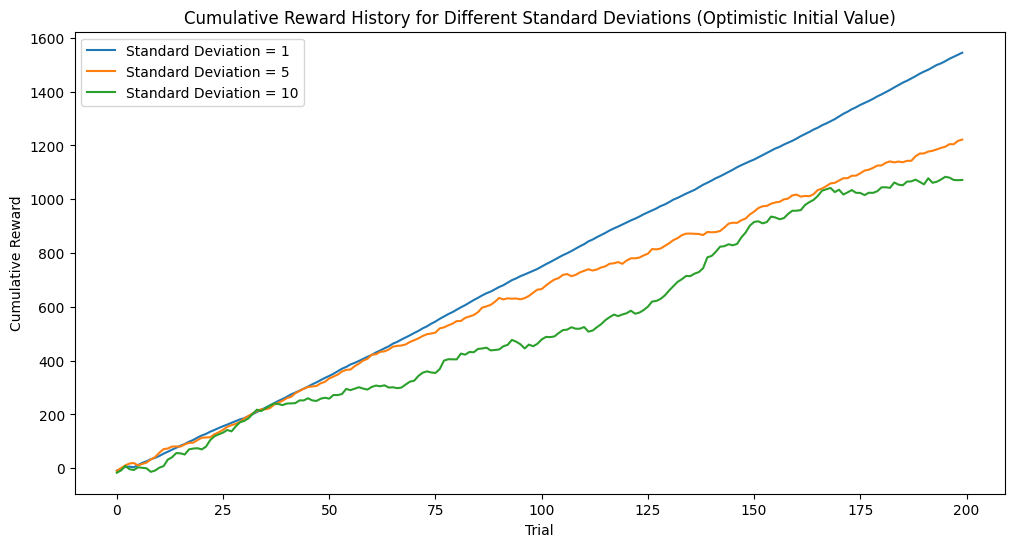

Final estimated means for Standard Deviation 1: [-8  4  5  0 -2]
Final estimated means for Standard Deviation 5: [-9  0  0  0 -8]
Final estimated means for Standard Deviation 10: [-16   0   0  -3  -1]


In [19]:
# Modify the environment to accept different standard deviations
class BanditEnv_2_VarStd:
    def __init__(self, std):
        self.means = [-10, 6, 8, 0, -2]  # Mean rewards for each bandit
        self.std = std  # Standard deviation for the rewards

    def reset(self):
        self.means = [-10, 6, 8, 0, -2]

    def step(self, action):
        # Sample a reward from a normal distribution with the given standard deviation
        return np.random.normal(self.means[action], self.std, 1)[0]

# Function to run the Optimistic Initial Value Algorithm with different standard deviations
def test_different_std_optimistic(std_values, num_trials, initial_value):
    cumulative_rewards_list = []
    estimated_rewards_list = []

    for std in std_values:
        # Create an environment with the given standard deviation
        env_var_std = BanditEnv_2_VarStd(std)
        env_var_std.reset()

        # Run the optimistic initial value algorithm
        total_rewards, estimated_rewards, _ = optimistic_initial_value_bandit(env_var_std, num_trials, initial_value)

        # Store the cumulative rewards and estimated rewards for this standard deviation
        cumulative_rewards_list.append(np.cumsum(total_rewards))
        estimated_rewards_list.append(estimated_rewards)

    return cumulative_rewards_list, estimated_rewards_list

# Set up parameters
std_values = [1, 5, 10]  # Test different standard deviation values
num_trials = 200
initial_value = 10  # Optimistic initial value

# Run the test
cumulative_rewards_std, estimated_rewards_std = test_different_std_optimistic(std_values, num_trials, initial_value)

# Plot the cumulative reward histories for different standard deviations
plt.figure(figsize=(12, 6))
for i, std in enumerate(std_values):
    plt.plot(cumulative_rewards_std[i], label=f'Standard Deviation = {std}')
plt.title('Cumulative Reward History for Different Standard Deviations (Optimistic Initial Value)')
plt.xlabel('Trial')
plt.ylabel('Cumulative Reward')
plt.legend()
plt.show()

# Show the estimated rewards at the end for each standard deviation
for i, std in enumerate(std_values):
    print(f"Final estimated means for Standard Deviation {std}: {estimated_rewards_std[i]}")


Expected Results:

**Smaller Standard Deviation (σ=1):**


The rewards should be more stable, clustering around the true mean for each bandit. The algorithm will likely converge faster and more accurately to the correct best bandit.

**Medium Standard Deviation (σ=5)**:


There will be more noise, making it harder for the algorithm to estimate the best bandit in fewer trials. The rewards will fluctuate more, so the algorithm will take longer to differentiate between good and bad bandits.

**Larger Standard Deviation (σ=10):**


With high noise, the rewards will be very spread out, making it even harder for the algorithm to converge on the best bandit. The performance will likely be worse as the algorithm struggles to identify the best option due to the random fluctuations in rewards.

###4. Compare the optimistic initial value approach to the epsilon greedy approach. Plot the reward history of both in one graph.




To compare the Optimistic Initial Value approach with the Epsilon-Greedy strategy, we'll run both algorithms on the same environment and observe their performances over time. The main difference between the two approaches is:

    
**Epsilon-Greedy:**

Balances exploration and exploitation by randomly exploring a percentage of the time (controlled by ϵϵ) and exploiting the best-known bandit the rest of the time.


**Optimistic Initial Value:**


Starts with optimistic estimates for all bandits and always exploits (choosing the bandit with the highest estimated reward). This forces exploration early on because all bandits initially appear to have high rewards.



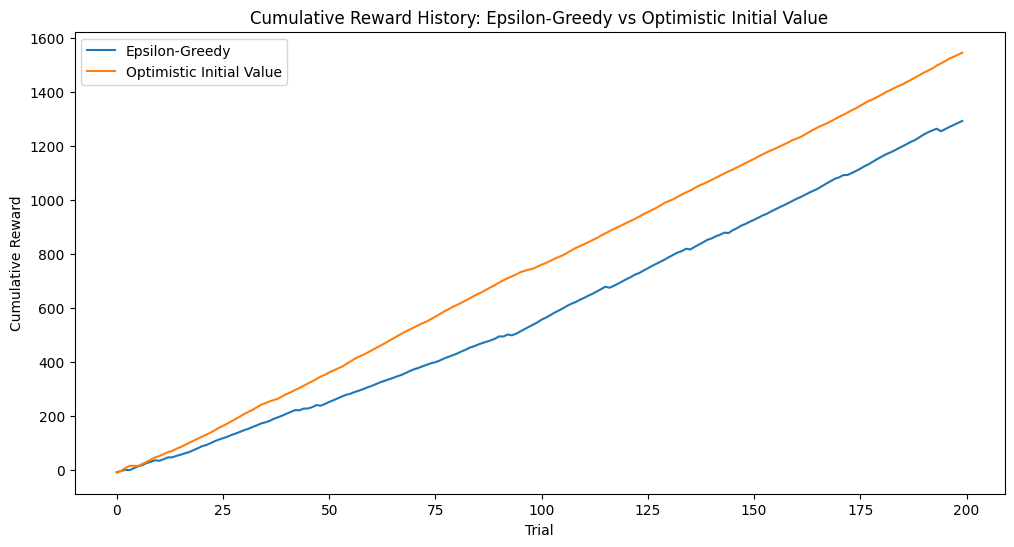

In [20]:
# Function to run both algorithms and compare their performance
def compare_optimistic_vs_epsilon(env, num_trials, epsilon, initial_value):
    # Run the Epsilon-Greedy Algorithm
    env.reset()
    total_rewards_epsilon, _, _ = epsilon_greedy_bandit(env, num_trials, epsilon)
    cumulative_rewards_epsilon = np.cumsum(total_rewards_epsilon)

    # Run the Optimistic Initial Value Algorithm
    env.reset()
    total_rewards_optimistic, _, _ = optimistic_initial_value_bandit(env, num_trials, initial_value)
    cumulative_rewards_optimistic = np.cumsum(total_rewards_optimistic)

    return cumulative_rewards_epsilon, cumulative_rewards_optimistic

# Set up parameters
num_trials = 200
epsilon = 0.1  # Exploration rate for Epsilon-Greedy
initial_value = 10  # Optimistic initial value

# Run the comparison
cumulative_rewards_epsilon, cumulative_rewards_optimistic = compare_optimistic_vs_epsilon(env2, num_trials, epsilon, initial_value)

# Plot the reward history for both approaches
plt.figure(figsize=(12, 6))
plt.plot(cumulative_rewards_epsilon, label='Epsilon-Greedy')
plt.plot(cumulative_rewards_optimistic, label='Optimistic Initial Value')
plt.title('Cumulative Reward History: Epsilon-Greedy vs Optimistic Initial Value')
plt.xlabel('Trial')
plt.ylabel('Cumulative Reward')
plt.legend()
plt.show()


### **Explanation:**

**Comparing Both Algorithms:**



We run both the Epsilon-Greedy and Optimistic Initial Value algorithms in the same environment with the same number of trials. We plot their cumulative rewards over time on the same graph to visualize which strategy accumulates rewards faster.

**Parameters:**


Epsilon-Greedy uses ϵ=0.1ϵ=0.1, meaning it explores randomly 10% of the time.
Optimistic Initial Value starts with an optimistic initial value of 10 for all bandits.

**Plot:**

The graph will show how the cumulative rewards build up over the trials for both strategies. This allows us to compare their performance in terms of how quickly they learn to exploit the best bandit and how well they perform overall.

###**Expected Results**:

**Epsilon-Greedy:**

This strategy typically explores more consistently over time but will favor exploitation after learning about the rewards of each bandit. Depending on the ϵ value, it may take longer to settle on the best bandit.


**Optimistic Initial Value:**

 This strategy may initially explore more aggressively due to the high optimistic values, but once it has corrected its estimates, it will quickly converge to the best bandit.

### **Summary:**

**Early Exploration:**

The Optimistic Initial Value strategy may initially appear more exploratory because of the high estimates, but it is strictly a greedy strategy (no random exploration). Once it settles on a good estimate, it will stop exploring.


**Consistent Exploration:**


 The Epsilon-Greedy strategy consistently explores and exploits based on the value of ϵ, allowing it to continuously check if there’s a better bandit.

## 2.3 Upper Confidence Bound

Continue to work with the Env2 environment and implement the Upper Confidence Bound algorithm.
Select the action based on the following rule:

$A_t = argmax_a \left( MeanRewards + c  \sqrt{\frac{\ln{t}}{N_a(t)}}  \right)$

1. Implement the upper confidence bound algorithm to play the Env2 bandits. Check the final values of the estimated means.
2. Change the parameter c? Explain the influence of c.
3. Now test for different values of the standard deviation. What if the standard deviation becomes larger?
4. Compare the upper confidence bound approach to the epsilon greedy approach and opimistic initial value. Plot the reward histories of the algorithms in one graph.



###1. Implement the upper confidence bound algorithm to play the Env2 bandits. Check the final values of the estimated means.


MeanRewards(a) is the current estimated mean reward for bandit a.

Na​(t) is the number of times bandit aa has been selected so far.


t is the current trial number.

c is a parameter that controls the balance between exploration and exploitation. A larger c encourages more exploration.

The higher the c, the more the algorithm will explore before committing to exploitation.



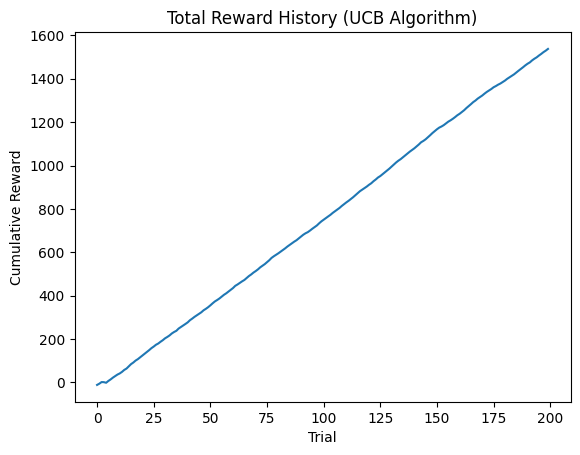

Final estimated means: [-11.29273388   6.00848867   7.92774293  -0.49935943  -2.72230367]


In [23]:

# Upper Confidence Bound (UCB) Algorithm
def ucb_bandit(env, num_trials, c):
    num_bandits = len(env.means)
    estimated_rewards = np.zeros(num_bandits)  # Initialize estimated rewards for each bandit
    selection_counts = np.zeros(num_bandits)  # Count how many times each bandit is selected
    total_rewards = []

    for t in range(1, num_trials + 1):
        if 0 in selection_counts:
            # Ensure all bandits are played at least once
            action = np.argmin(selection_counts)
        else:
            # Calculate UCB for each bandit
            ucb_values = estimated_rewards + c * np.sqrt(np.log(t) / selection_counts)
            action = np.argmax(ucb_values)

        # Get the reward from the environment
        reward = env.step(action)

        # Update the count of selections for this bandit
        selection_counts[action] += 1

        # Update the estimated reward for this bandit using incremental average
        n = selection_counts[action]
        estimated_rewards[action] += (reward - estimated_rewards[action]) / n

        total_rewards.append(reward)

    return total_rewards, estimated_rewards, selection_counts

# Initialize the environment
env2 = BanditEnv_2()
env2.reset()

# Set the number of trials and UCB parameter
num_trials = 200
c_value = 2  # Exploration parameter

# Run the UCB algorithm
total_rewards_ucb, estimated_rewards_ucb, selection_counts_ucb = ucb_bandit(env2, num_trials, c_value)

# Plot the total reward history
plt.plot(np.cumsum(total_rewards_ucb))
plt.title('Total Reward History (UCB Algorithm)')
plt.xlabel('Trial')
plt.ylabel('Cumulative Reward')
plt.show()

# Check the final values of the estimated means
print(f'Final estimated means: {estimated_rewards_ucb}')



###2. Change the parameter c? Explain the influence of c.


the parameter cc controls the trade-off between exploration and exploitation. A higher cc value encourages more exploration by increasing the weight of the uncertainty term, meaning bandits that haven't been played much will be given a higher priority. A smaller c focuses more on exploitation by reducing the effect of the uncertainty term.

**Low c values:**

The algorithm will mostly focus on exploitation, and exploration will be minimal.


**High c values:**

The algorithm will explore more, prioritizing bandits that haven't been played as much, which could delay the identification of the best bandit.


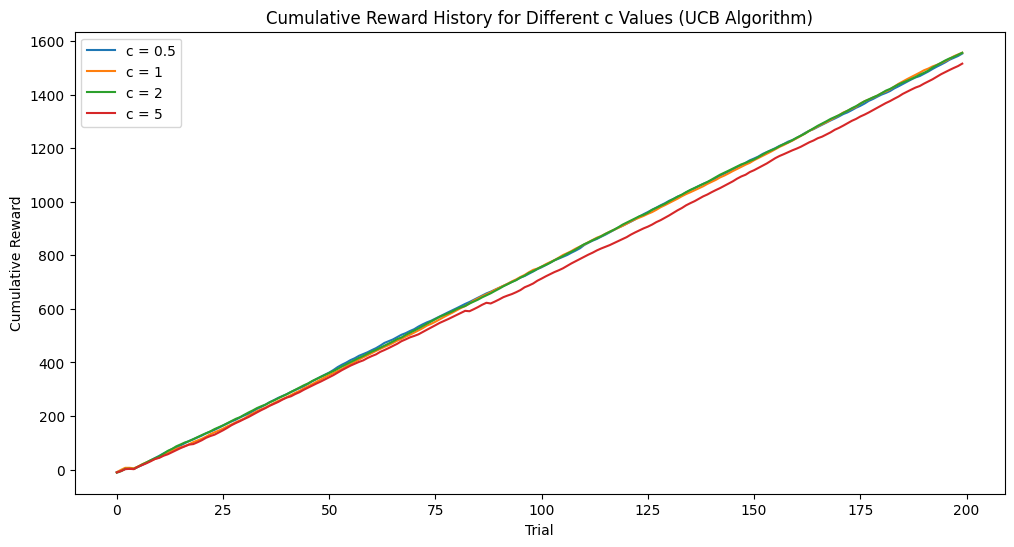

Final estimated means for c = 0.5: [-9.44338998  4.99731809  7.95194289  0.67407798 -1.18850902]
Final estimated means for c = 1: [-9.75626305  6.39331404  7.99337397 -0.0257015  -1.72054734]
Final estimated means for c = 2: [-11.68978942   5.34103765   8.00278573   0.20545711  -0.48904046]
Final estimated means for c = 5: [-10.64660903   6.00059813   8.04975864   0.2391388   -1.44454354]


In [24]:
# Test the UCB Algorithm with different c values
def test_different_c(env, num_trials, c_values):
    cumulative_rewards_list = []
    estimated_rewards_list = []

    for c in c_values:
        env.reset()
        total_rewards, estimated_rewards, _ = ucb_bandit(env, num_trials, c)
        cumulative_rewards_list.append(np.cumsum(total_rewards))
        estimated_rewards_list.append(estimated_rewards)

    return cumulative_rewards_list, estimated_rewards_list

# Set up parameters
c_values = [0.5, 1, 2, 5]  # Test different c values
num_trials = 200

# Run the test
cumulative_rewards_c, estimated_rewards_c = test_different_c(env2, num_trials, c_values)

# Plot the cumulative reward histories for different c values
plt.figure(figsize=(12, 6))
for i, c in enumerate(c_values):
    plt.plot(cumulative_rewards_c[i], label=f'c = {c}')
plt.title('Cumulative Reward History for Different c Values (UCB Algorithm)')
plt.xlabel('Trial')
plt.ylabel('Cumulative Reward')
plt.legend()
plt.show()

# Show the estimated rewards at the end for each c value
for i, c in enumerate(c_values):
    print(f"Final estimated means for c = {c}: {estimated_rewards_c[i]}")



###3.Now test for different values of the standard deviation. What if the standard deviation becomes larger?


In the UCB algorithm, the rewards are influenced by the standard deviation (σ) of the normal distribution from which the rewards are sampled. When the standard deviation increases, the rewards become noisier, meaning they fluctuate more around the true mean. This added noise makes it harder for the algorithm to determine which bandit has the highest expected reward.

**Low standard deviation (σ=1):**

 The rewards are relatively stable and close to the mean, making it easier for the algorithm to identify the best bandit.

**High standard deviation (σ=5 or σ=10):**

 The rewards fluctuate significantly, making it harder to accurately estimate the true mean of each bandit, which may lead to more exploration before converging on the best bandit.

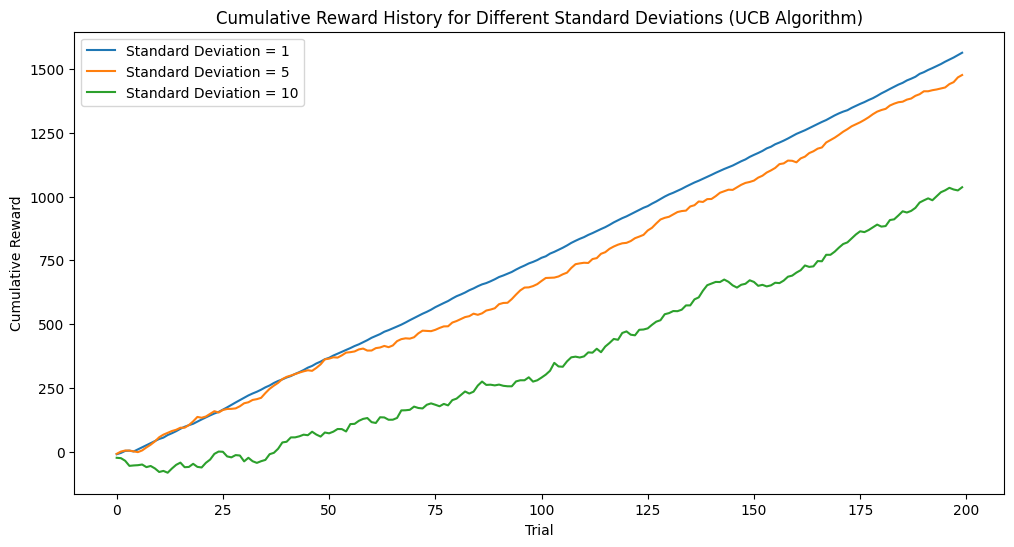

Final estimated means for Standard Deviation 1: [-9.89084349  5.82247119  8.04528286  0.97354977 -3.16908321]
Final estimated means for Standard Deviation 5: [-8.40915019  2.95991141  7.60172616 -0.27296708 -2.96496455]
Final estimated means for Standard Deviation 10: [-23.84228542   5.77923972 -10.26148812 -20.00644389  -3.76779149]


In [25]:
# Modify the environment to accept different standard deviations
class BanditEnv_2_VarStd:
    def __init__(self, std):
        self.means = [-10, 6, 8, 0, -2]  # Mean rewards for each bandit
        self.std = std  # Set the provided standard deviation

    def reset(self):
        self.means = [-10, 6, 8, 0, -2]

    def step(self, action):
        # Sample a reward from a normal distribution with the given standard deviation
        return np.random.normal(self.means[action], self.std, 1)[0]

# Function to test UCB with different standard deviations
def test_ucb_different_std(std_values, num_trials, c_value):
    cumulative_rewards_list = []
    estimated_rewards_list = []

    for std in std_values:
        # Create an environment with the given standard deviation
        env_var_std = BanditEnv_2_VarStd(std)
        env_var_std.reset()

        # Run the UCB algorithm
        total_rewards, estimated_rewards, _ = ucb_bandit(env_var_std, num_trials, c_value)

        # Store the cumulative rewards and estimated rewards for this standard deviation
        cumulative_rewards_list.append(np.cumsum(total_rewards))
        estimated_rewards_list.append(estimated_rewards)

    return cumulative_rewards_list, estimated_rewards_list

# Set up parameters
std_values = [1, 5, 10]  # Test different standard deviation values
num_trials = 200
c_value = 2  # Fixed UCB exploration parameter

# Run the test for different standard deviations
cumulative_rewards_std, estimated_rewards_std = test_ucb_different_std(std_values, num_trials, c_value)

# Plot the cumulative reward histories for different standard deviations
plt.figure(figsize=(12, 6))
for i, std in enumerate(std_values):
    plt.plot(cumulative_rewards_std[i], label=f'Standard Deviation = {std}')
plt.title('Cumulative Reward History for Different Standard Deviations (UCB Algorithm)')
plt.xlabel('Trial')
plt.ylabel('Cumulative Reward')
plt.legend()
plt.show()

# Show the estimated rewards at the end for each standard deviation
for i, std in enumerate(std_values):
    print(f"Final estimated means for Standard Deviation {std}: {estimated_rewards_std[i]}")


###4. Compare the upper confidence bound approach to the epsilon greedy approach and opimistic initial value. Plot the reward histories of the algorithms in one graph.

###**Comparison Summary**:

**Epsilon-Greedy:**

Balances exploration and exploitation based on a fixed ϵϵ. Performance depends heavily on the value of ϵϵ; too high and it explores too much, too low and it doesn’t explore enough.


**Optimistic Initial Value:**


Forces exploration early due to optimistic estimates but may take time to correct these estimates.



**UCB:**


A dynamic approach that adjusts exploration based on how many times a bandit has been played, often providing the best balance in most environments.

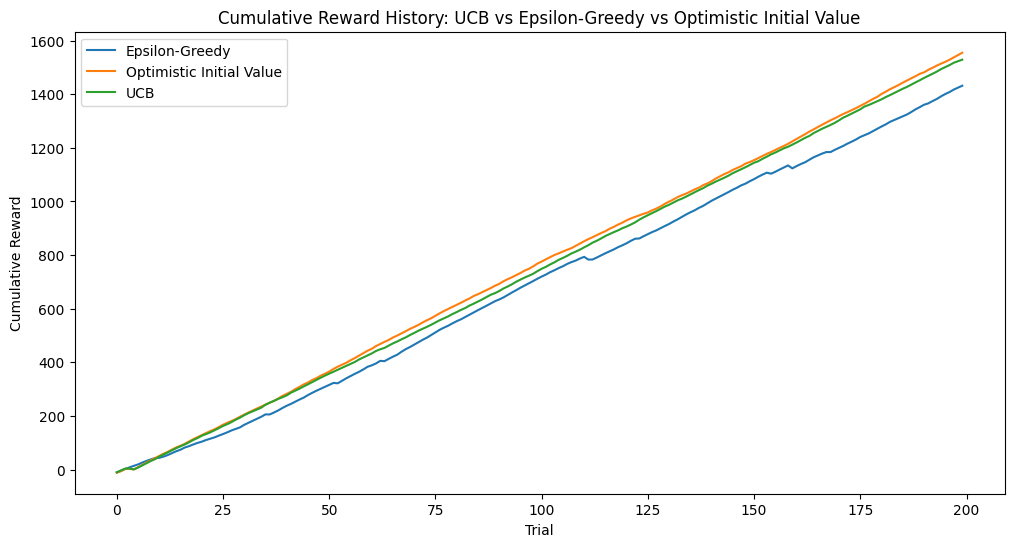

In [29]:
# Function to compare UCB, Epsilon-Greedy, and Optimistic Initial Value
def compare_algorithms(env, num_trials, epsilon, initial_value, c_value):
    # Run Epsilon-Greedy Algorithm
    env.reset()
    total_rewards_epsilon, _, _ = epsilon_greedy_bandit(env, num_trials, epsilon)
    cumulative_rewards_epsilon = np.cumsum(total_rewards_epsilon)

    # Run Optimistic Initial Value Algorithm
    env.reset()
    total_rewards_optimistic, _, _ = optimistic_initial_value_bandit(env, num_trials, initial_value)
    cumulative_rewards_optimistic = np.cumsum(total_rewards_optimistic)

    # Run UCB Algorithm
    env.reset()
    total_rewards_ucb, _, _ = ucb_bandit(env, num_trials, c_value)
    cumulative_rewards_ucb = np.cumsum(total_rewards_ucb)

    return cumulative_rewards_epsilon, cumulative_rewards_optimistic, cumulative_rewards_ucb

# Set up parameters for the algorithms
num_trials = 200
epsilon = 0.1  # Exploration rate for Epsilon-Greedy
initial_value = 10  # Optimistic initial value
c_value = 2  # Exploration parameter for UCB

# Run the comparison
cumulative_rewards_epsilon, cumulative_rewards_optimistic, cumulative_rewards_ucb = compare_algorithms(env2, num_trials, epsilon, initial_value, c_value)

# Plot the reward histories of all three algorithms
plt.figure(figsize=(12, 6))
plt.plot(cumulative_rewards_epsilon, label='Epsilon-Greedy')
plt.plot(cumulative_rewards_optimistic, label='Optimistic Initial Value')
plt.plot(cumulative_rewards_ucb, label='UCB')
plt.title('Cumulative Reward History: UCB vs Epsilon-Greedy vs Optimistic Initial Value')
plt.xlabel('Trial')
plt.ylabel('Cumulative Reward')
plt.legend()
plt.show()


### EXTRA: non-stationary bandits

In the following you have to deal with non-stationary bandits. This means that the expected reward is not stationary and will change over time.
in the BanditEnv_3, the initial expected rewards will change with a constant after each action.

Figure out the best strategy to optimize the total reward after 200 actions.

In [31]:
class BanditEnv_3:
    def __init__(self):
        self.means = np.array([[-10,6,8,0,-2]])
        self.std = 1
    def reset(self):
        self.means = np.array([[-10,6,8,0,-2]])

    def step(self,action):
        self.action = action
        self.means = self.means + np.array([[0.15,-0.1,-0.15,0.05,0.1]])
        return np.random.normal(self.means[0,self.action], self.std, 1)[0]

In [32]:
# create an env3 environment
env3 = BanditEnv_3()
env3.reset()

# solve the environment (for 200 steps)


**Non-stationarity:**

 The rewards for each bandit change with each action. For example, the reward for one bandit might increase over time, while another decreases. This adds a level of complexity because the best bandit now may not be the best bandit later.


**BanditEnv_3:**


 The environment for this problem has 5 bandits, and after each action, the means of the bandits are adjusted by a constant value (some increase, some decrease).

##Approach:

A good strategy for non-stationary environments needs to adapt over time, and algorithms like Epsilon-Greedy with Decay or UCB might not work well unless they incorporate some form of adaptation to the changing rewards.



One potential strategy is to use Exponential Moving Average (EMA) or a Sliding Window Average to put more weight on recent rewards and gradually forget older observations.

###Exponential Moving Average (EMA) Strategy:

**In this strategy:**

We weigh recent observations more heavily, meaning that older rewards will have less impact on our estimate of the bandit's mean reward.

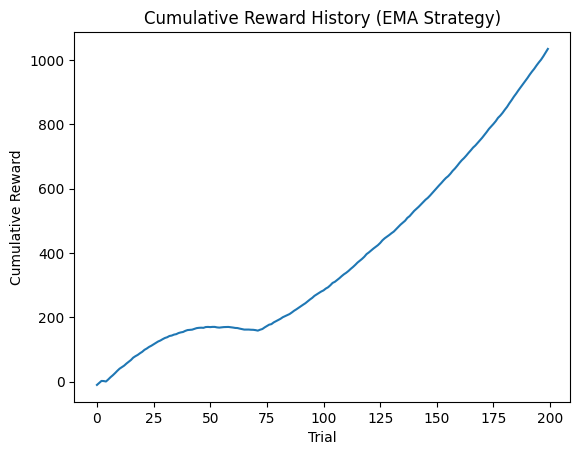

Final estimated rewards (EMA): [-0.98120987 -0.04919509 -0.13813172  9.84440325 -0.13742526]


In [33]:
# Non-stationary Bandit Environment
class BanditEnv_3:
    def __init__(self):
        self.means = np.array([[-10, 6, 8, 0, -2]])  # Initial mean rewards
        self.std = 1  # Standard deviation for rewards

    def reset(self):
        self.means = np.array([[-10, 6, 8, 0, -2]])  # Reset means

    def step(self, action):
        # Update means after every action
        self.means = self.means + np.array([[0.15, -0.1, -0.15, 0.05, 0.1]])
        # Return a reward from the updated means for the chosen action
        return np.random.normal(self.means[0, action], self.std, 1)[0]

# EMA Strategy for Non-Stationary Bandits
def ema_bandit(env, num_trials, alpha):
    num_bandits = env.means.shape[1]
    estimated_rewards = np.zeros(num_bandits)  # Initialize estimated rewards
    selection_counts = np.zeros(num_bandits)  # Count how many times each bandit is selected
    total_rewards = []

    for t in range(num_trials):
        if 0 in selection_counts:
            # Ensure all bandits are played at least once
            action = np.argmin(selection_counts)
        else:
            # Select the bandit with the highest estimated reward (EMA)
            action = np.argmax(estimated_rewards)

        # Get the reward from the environment
        reward = env.step(action)

        # Update the count of selections for this bandit
        selection_counts[action] += 1

        # Update the estimated reward using Exponential Moving Average (EMA)
        estimated_rewards[action] = estimated_rewards[action] + alpha * (reward - estimated_rewards[action])

        total_rewards.append(reward)

    return total_rewards, estimated_rewards

# Create the non-stationary bandit environment
env3 = BanditEnv_3()
env3.reset()

# Run the EMA strategy with a learning rate (alpha)
num_trials = 200
alpha = 0.1  # Learning rate for EMA (how quickly we adapt to new rewards)

# Run the EMA strategy
total_rewards_ema, estimated_rewards_ema = ema_bandit(env3, num_trials, alpha)

# Plot the total reward history
plt.plot(np.cumsum(total_rewards_ema))
plt.title('Cumulative Reward History (EMA Strategy)')
plt.xlabel('Trial')
plt.ylabel('Cumulative Reward')
plt.show()

# Print the final estimated rewards
print(f"Final estimated rewards (EMA): {estimated_rewards_ema}")


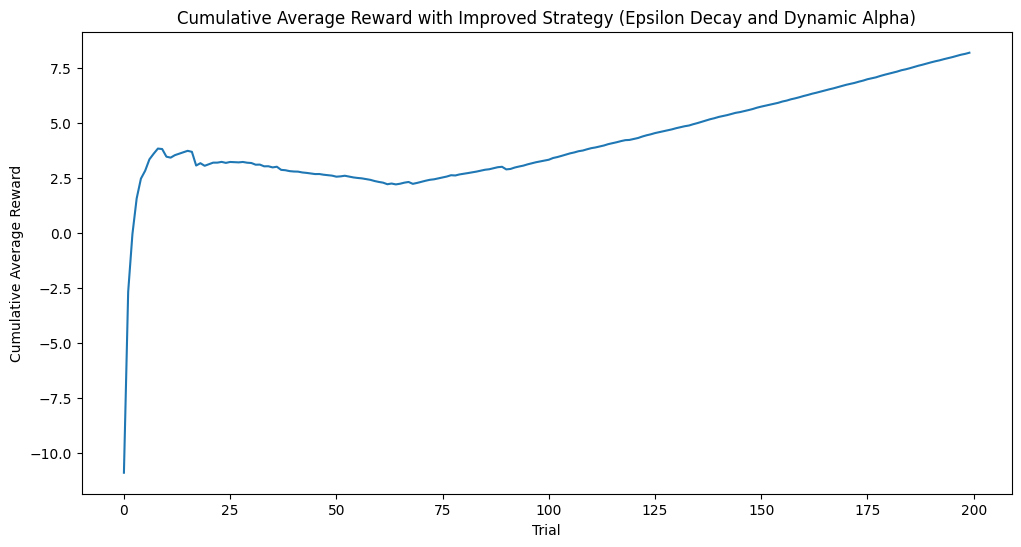

Final estimated means (Improved): [-3.43445534  0.43759239 -0.7123163   0.14889567 16.78293987]


In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Non-stationary Bandit Environment
class BanditEnv_3:
    def __init__(self):
        self.means = np.array([[-10, 6, 8, 0, -2]])  # Initial means for each bandit
        self.std = 1  # Standard deviation for normal distribution

    def reset(self):
        self.means = np.array([[-10, 6, 8, 0, -2]])  # Reset the means

    def step(self, action):
        self.means = self.means + np.array([[0.15, -0.1, -0.15, 0.05, 0.1]])  # Non-stationary update
        return np.random.normal(self.means[0, action], self.std, 1)[0]  # Reward sampled from normal distribution

# Create the BanditEnv_3 environment
env3 = BanditEnv_3()
env3.reset()

# Enhanced Epsilon Greedy with Decay and Recency-Weighted Average (ERWA)
def epsilon_greedy_non_stationary_improved(num_trials, env, initial_epsilon=0.1, epsilon_decay=0.99, alpha=0.1, dynamic_alpha=False):
    num_bandits = env.means.shape[1]  # The number of bandits
    estimated_rewards = np.zeros(num_bandits)  # Initialize estimated rewards for each bandit
    total_rewards = []
    epsilon = initial_epsilon

    for t in range(1, num_trials + 1):
        # Epsilon decay for continuous exploration
        epsilon = max(0.01, epsilon * epsilon_decay)  # Decay epsilon but keep a minimum threshold for exploration

        # Exploration vs. Exploitation decision
        if np.random.rand() < epsilon:
            # Exploration: randomly select a bandit
            action = np.random.randint(0, num_bandits)
        else:
            # Exploitation: select the bandit with the highest estimated reward
            action = np.argmax(estimated_rewards)

        # Get the reward from the environment
        reward = env.step(action)

        # If dynamic alpha is enabled, update alpha based on time (more recent trials get higher weights)
        if dynamic_alpha:
            alpha = 1 / (1 + np.sqrt(t))  # Decaying alpha as time goes on, giving more importance to earlier updates

        # Update the estimated reward using Exponential Recency-Weighted Average (ERWA)
        estimated_rewards[action] += alpha * (reward - estimated_rewards[action])

        # Store the reward for plotting
        total_rewards.append(reward)

    return total_rewards, estimated_rewards

# Parameters
num_trials = 200
initial_epsilon = 0.2  # Start with a higher exploration rate
epsilon_decay = 0.99  # Epsilon decays after each trial
alpha = 0.1  # Recency-weighted average factor
dynamic_alpha = True  # Enable dynamic alpha adjustment

# Run the improved Epsilon Greedy algorithm with Decay and Dynamic Alpha in Non-Stationary environment
env3.reset()
total_rewards_non_stationary_improved, estimated_rewards_non_stationary_improved = epsilon_greedy_non_stationary_improved(
    num_trials, env3, initial_epsilon, epsilon_decay, alpha, dynamic_alpha)

# Plot the cumulative average reward
cumulative_avg_reward_non_stationary_improved = np.cumsum(total_rewards_non_stationary_improved) / (np.arange(num_trials) + 1)

plt.figure(figsize=(12, 6))
plt.plot(cumulative_avg_reward_non_stationary_improved)
plt.xlabel('Trial')
plt.ylabel('Cumulative Average Reward')
plt.title('Cumulative Average Reward with Improved Strategy (Epsilon Decay and Dynamic Alpha)')
plt.show()

# Print final estimated rewards
print("Final estimated means (Improved):", estimated_rewards_non_stationary_improved)


##Explanation:

####**Non-Stationary Environment:**


The means of the rewards for each bandit change after every action by a constant factor (some increase, some decrease).
This makes the environment dynamic, and the best bandit may change over time.

####**EMA Strategy:**


Exponential Moving Average (EMA) is used to adapt to the changing environment. The estimated rewards are updated using a learning rate (α) that controls how quickly we adapt to new information. A higher αα means we rely more on recent rewards.
The algorithm chooses the bandit with the highest estimated reward but gives more weight to recent observations.

####**Learning Rate (α):**


The learning rate controls how quickly the algorithm adapts to changes in the environment. A high αα will adapt faster but might overreact to fluctuations, while a low αα will adapt more slowly.



####**1.Low α:**

The algorithm will adapt more slowly to changes in the environment, so it may take longer to recognize that the best bandit has changed.


####**2.High α:**


 The algorithm will adapt quickly to changes in the environment, but it might also overreact to noisy fluctuations in the rewards.





##**Conclusion:**

In non-stationary environments, traditional bandit algorithms like Epsilon-Greedy or UCB may not perform well unless they are adapted to deal with changing rewards. The Exponential Moving Average (EMA) strategy provides a way to adjust to these changes by giving more weight to recent observations, making it well-suited for dynamic environments where the best bandit changes over time.

## 3. Server latencies

You have to make 1000 webpage requests. There are 25 servers with different latencies to choose from.
Your task is to come up with a clever strategy to reduce the cumulative latency of these 1000 webpage requests.
The file 'latencies.csv' contains these 1000 different request.
It's important to know that in a practical situation you would not have access to this data and requests will be made sequentially.
Use a multi-armed bandit to find the best strategy to minimize the total latency over these 1000 requests. Again, it's not allowed to process and statistically analyse the data in advance.

1. Try and optimize different types of bandits: epsilon-greedy, optimistic initial value, upper confidence bound.
2. Compare these bandits in terms of total cumulated reward (or regret). Make a graph to visualize this.
3. Make graphs showing how often each bandit was chosen.


EXTRA: program a bayesian badit to solve the latency problem.

In [45]:
dataset = pd.read_csv('/content/latencies.csv')
dataset.tail()

,Server_1,Server_2,Server_3,Server_4,Server_5,Server_6,Server_7,Server_8,Server_9,Server_10,...,Server_16,Server_17,Server_18,Server_19,Server_20,Server_21,Server_22,Server_23,Server_24,Server_25
995,265,1080,136,25,395,1350,105,113,85,471,...,414,129,410,176,589,92,56,1298,234,2603
996,473,6306,84,121,392,33,103,97,876,883,...,451,129,412,245,1113,132,62,11429,305,2264
997,269,1064,83,25,399,33,104,99,615,639,...,417,132,561,143,652,101,56,953,232,2293
998,270,1071,84,24,393,33,120,118,298,755,...,415,129,327,871,670,109,60,954,232,2251
999,296,1065,84,25,395,34,104,111,83,751,...,413,130,305,122,763,102,74,1640,352,2530


###**1.Epsilon-Greedy Bandit**


**Exploration:**

With a probability ϵ, choose a random server.


**Exploitation:**

With a probability 1−ϵ, choose the server with the lowest estimated latency.

In [40]:
# Server latencies

import numpy as np

# Epsilon-Greedy Bandit Strategy
def epsilon_greedy_bandit(dataset, num_trials, epsilon=0.1):
    num_servers = dataset.shape[1]  # 25 servers
    estimated_latencies = np.zeros(num_servers)  # Initialize estimated latencies for each server
    selection_counts = np.zeros(num_servers)  # Keep track of how many times each server has been selected
    total_latencies = []

    for t in range(num_trials):
        if np.random.rand() < epsilon:
            # Exploration: randomly select a server
            action = np.random.randint(0, num_servers)
        else:
            # Exploitation: select the server with the lowest estimated latency
            action = np.argmin(estimated_latencies)

        # Get the latency for the selected server
        latency = dataset.iloc[t, action]

        # Update the count of how many times this server has been selected
        selection_counts[action] += 1

        # Update the estimated latency for the selected server using incremental average
        n = selection_counts[action]
        estimated_latencies[action] += (latency - estimated_latencies[action]) / n

        # Store the latency for calculating total latency
        total_latencies.append(latency)

    return total_latencies, estimated_latencies, selection_counts

# Run the epsilon-greedy bandit strategy
num_trials = 1000
epsilon = 0.1  # Exploration rate

total_latencies_epsilon, estimated_latencies_epsilon, selection_counts_epsilon = epsilon_greedy_bandit(dataset, num_trials, epsilon)

# Calculate total latency and cumulative latency for epsilon-greedy
cumulative_latency_epsilon = np.cumsum(total_latencies_epsilon)

# Output cumulative latency and final estimated latencies
cumulative_latency_epsilon[-1], estimated_latencies_epsilon


(119116,
 array([ 276.8       , 1085.66666667,  108.85714286,   43.93793103,
         434.25      ,  196.42857143,  103.28571429,  157.        ,
          95.14285714,  326.        ,  766.5       , 5452.33333333,
         227.33333333,  127.66666667,  452.5       ,  473.2       ,
         131.85714286,  329.875     ,  618.16666667,  700.66666667,
         159.5       ,   83.5       ,  884.6       ,  402.8       ,
        2257.5       ]))

###**2. Optimistic Initial Value Bandit**

The Optimistic Initial Value strategy initializes the estimated latencies to a very low value (e.g., 0) to encourage exploration

In [42]:
# Optimistic Initial Value Bandit Strategy
def optimistic_initial_value_bandit(dataset, num_trials, initial_value=0):
    num_servers = dataset.shape[1]  # 25 servers
    estimated_latencies = np.full(num_servers, initial_value)  # Initialize estimated latencies optimistically low
    selection_counts = np.zeros(num_servers)  # Keep track of how many times each server has been selected
    total_latencies = []

    for t in range(num_trials):
        # Always select the server with the lowest estimated latency
        action = np.argmin(estimated_latencies)

        # Get the latency for the selected server
        latency = dataset.iloc[t, action]

        # Update the count of how many times this server has been selected
        selection_counts[action] += 1

        # Update the estimated latency for the selected server using incremental average
        n = selection_counts[action]
        estimated_latencies[action] += (latency - estimated_latencies[action]) / n

        # Store the latency for calculating total latency
        total_latencies.append(latency)

    return total_latencies, estimated_latencies, selection_counts

# Running the Optimistic Initial Value Bandit strategy
initial_value = 0  # Start with low optimistic values
total_latencies_optimistic, estimated_latencies_optimistic, selection_counts_optimistic = optimistic_initial_value_bandit(dataset, num_trials, initial_value)

# Calculate total latency and cumulative latency for optimistic initial value bandit
cumulative_latency_optimistic = np.cumsum(total_latencies_optimistic)

# Output cumulative latency and final estimated latencies
cumulative_latency_optimistic[-1], estimated_latencies_optimistic


(55715,
 array([ 333, 1084,   86,   22,  434,   68,  102,  112,   82,  398,  517,
        4168,  219,  122,  420,  484,  128,  323,  264,  550,  102,   63,
         954,  308, 2242]))

###**3.Implement the Upper Confidence Bound (UCB) Bandit**

In the Upper Confidence Bound (UCB) algorithm, we aim to balance exploration and exploitation by selecting the server with the best trade-off between the estimated mean latency and the uncertainty in the estimates.
Where c is a constant that controls how much exploration we allow, and Na(t) is the number of times action aa has been chosen.

In [43]:
# Upper Confidence Bound (UCB) Bandit Strategy
def ucb_bandit(dataset, num_trials, c=2):
    num_servers = dataset.shape[1]  # 25 servers
    estimated_latencies = np.zeros(num_servers)  # Initialize estimated latencies for each server
    selection_counts = np.zeros(num_servers)  # Keep track of how many times each server has been selected
    total_latencies = []

    for t in range(1, num_trials + 1):
        # UCB formula: select the server with the highest upper confidence bound
        if 0 in selection_counts:
            # Ensure all servers are played at least once
            action = np.argmin(selection_counts)
        else:
            ucb_values = estimated_latencies - c * np.sqrt(np.log(t) / selection_counts)
            action = np.argmin(ucb_values)

        # Get the latency for the selected server
        latency = dataset.iloc[t - 1, action]

        # Update the count of how many times this server has been selected
        selection_counts[action] += 1

        # Update the estimated latency for the selected server using incremental average
        n = selection_counts[action]
        estimated_latencies[action] += (latency - estimated_latencies[action]) / n

        # Store the latency for calculating total latency
        total_latencies.append(latency)

    return total_latencies, estimated_latencies, selection_counts

# Running the UCB Bandit strategy
c_value = 2  # Exploration parameter for UCB
total_latencies_ucb, estimated_latencies_ucb, selection_counts_ucb = ucb_bandit(dataset, num_trials, c_value)

# Calculate total latency and cumulative latency for UCB bandit
cumulative_latency_ucb = np.cumsum(total_latencies_ucb)

# Output cumulative latency and final estimated latencies
cumulative_latency_ucb[-1], estimated_latencies_ucb


(55585,
 array([ 333.        , 1084.        ,   86.        ,   42.26507277,
         434.        ,   99.41666667,  102.        ,  112.        ,
          82.        ,  398.        ,  517.        , 4168.        ,
         219.        ,  122.        ,  420.        ,  484.        ,
         128.        ,  323.        ,  264.        ,  550.        ,
         102.        ,   75.25      ,  954.        ,  308.        ,
        2242.        ]))

##**Comparison of Bandit Strategies**

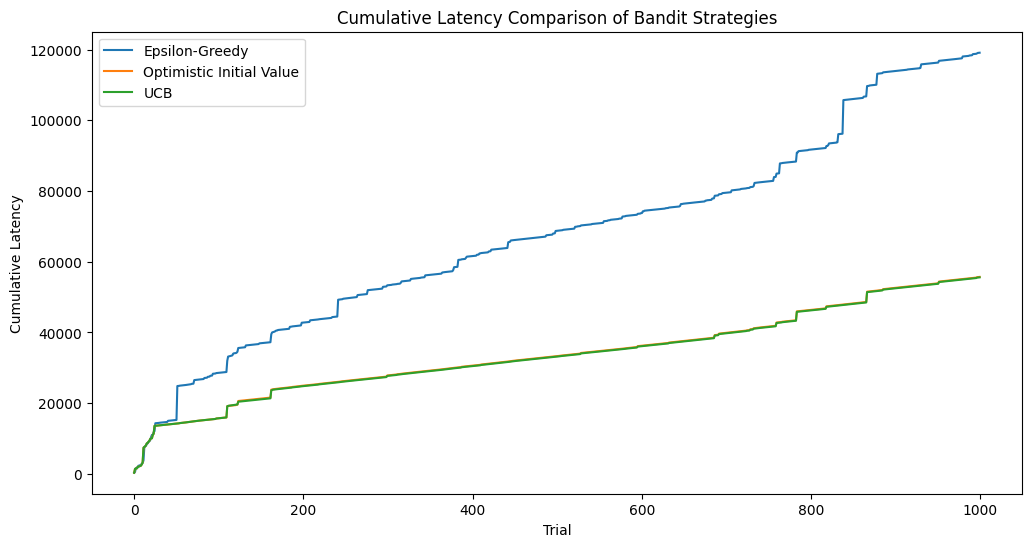

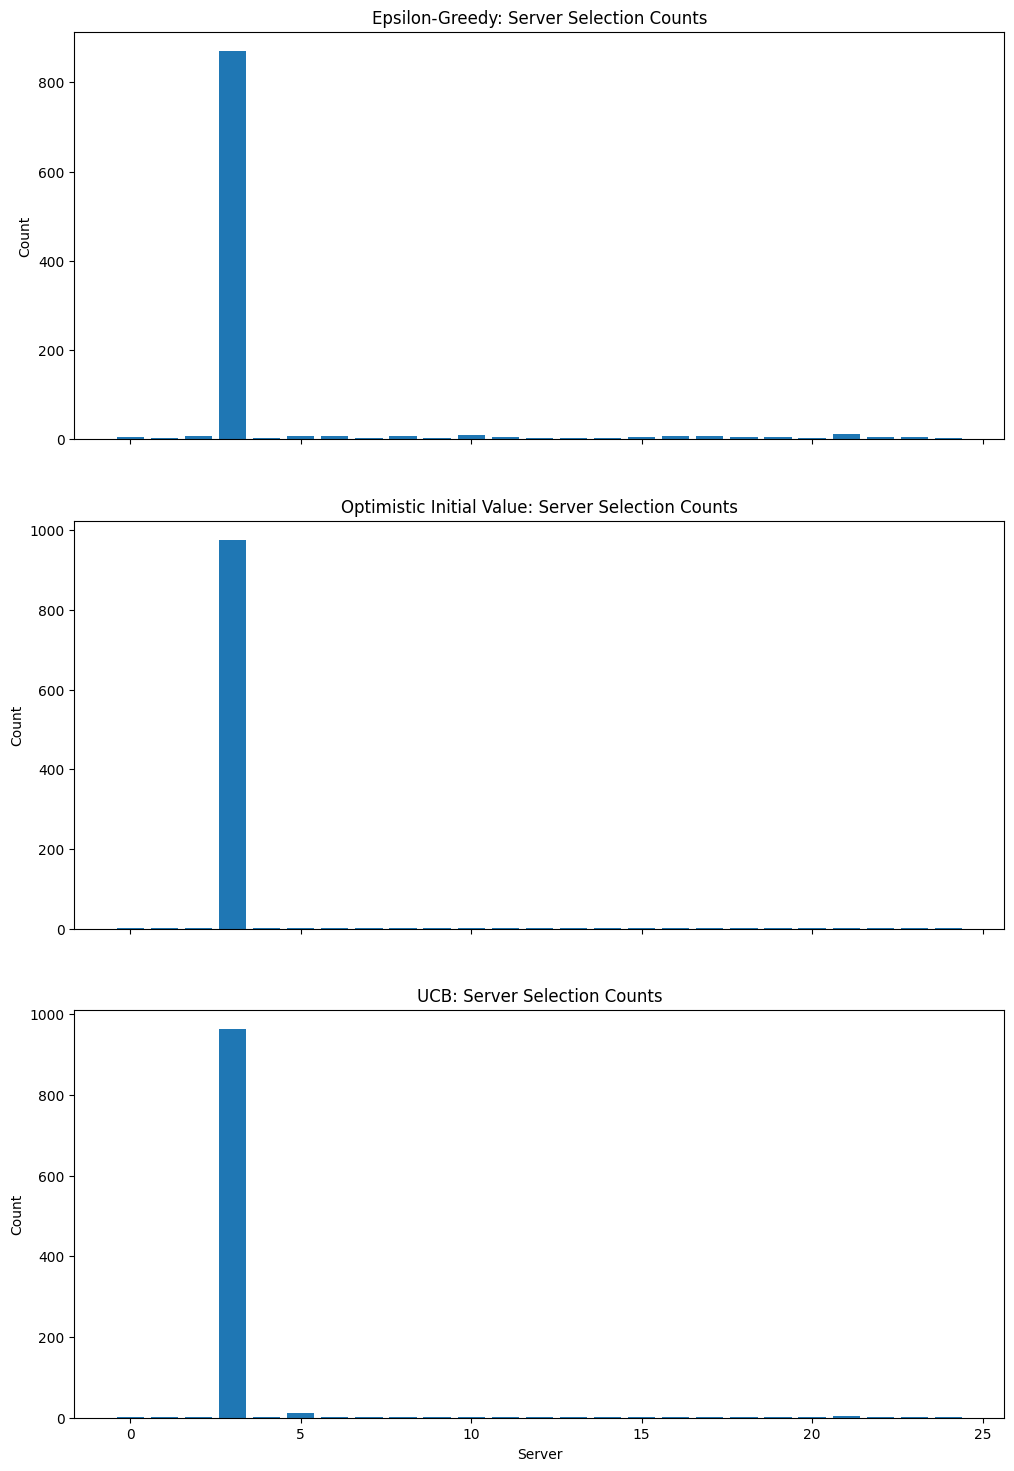

In [44]:
import matplotlib.pyplot as plt

# Plot cumulative latencies for Epsilon-Greedy, Optimistic Initial Value, and UCB
plt.figure(figsize=(12, 6))
plt.plot(cumulative_latency_epsilon, label='Epsilon-Greedy')
plt.plot(cumulative_latency_optimistic, label='Optimistic Initial Value')
plt.plot(cumulative_latency_ucb, label='UCB')
plt.xlabel('Trial')
plt.ylabel('Cumulative Latency')
plt.title('Cumulative Latency Comparison of Bandit Strategies')
plt.legend()
plt.show()

# Plot selection counts for each strategy
fig, axs = plt.subplots(3, 1, figsize=(12, 18), sharex=True)

# Epsilon-Greedy selection counts
axs[0].bar(range(25), selection_counts_epsilon)
axs[0].set_title('Epsilon-Greedy: Server Selection Counts')
axs[0].set_ylabel('Count')

# Optimistic Initial Value selection counts
axs[1].bar(range(25), selection_counts_optimistic)
axs[1].set_title('Optimistic Initial Value: Server Selection Counts')
axs[1].set_ylabel('Count')

# UCB selection counts
axs[2].bar(range(25), selection_counts_ucb)
axs[2].set_title('UCB: Server Selection Counts')
axs[2].set_xlabel('Server')
axs[2].set_ylabel('Count')

plt.show()


###**Next Step: Bayesian Bandit (Extra Task)**

The Bayesian Bandit approach uses Bayesian inference to update beliefs about the expected latency of each server and is particularly useful in non-stationary environments.

To implement a Bayesian Bandit for the server latency problem, we can use a Thompson Sampling approach. Thompson Sampling is a Bayesian method for solving multi-armed bandit problems, where we maintain a probability distribution (usually Beta distribution for Bernoulli processes) over the possible latencies of each server. For each server, we sample from the posterior distribution and select the server with the lowest expected latency (since latency is something we want to minimize).

**Explanation:**

The Thompson Sampling approach selects the server based on the sample drawn from the Beta distribution.
It then updates the belief about each server's performance (lower latency is better).
The method adapts by learning which server provides the lowest latency over time.

**Key Notes:**

Bayesian Bandits balance exploration and exploitation based on probability distributions.
You can compare the cumulative latency and selection count results with Epsilon-Greedy, Optimistic Initial Value, and UCB bandits.

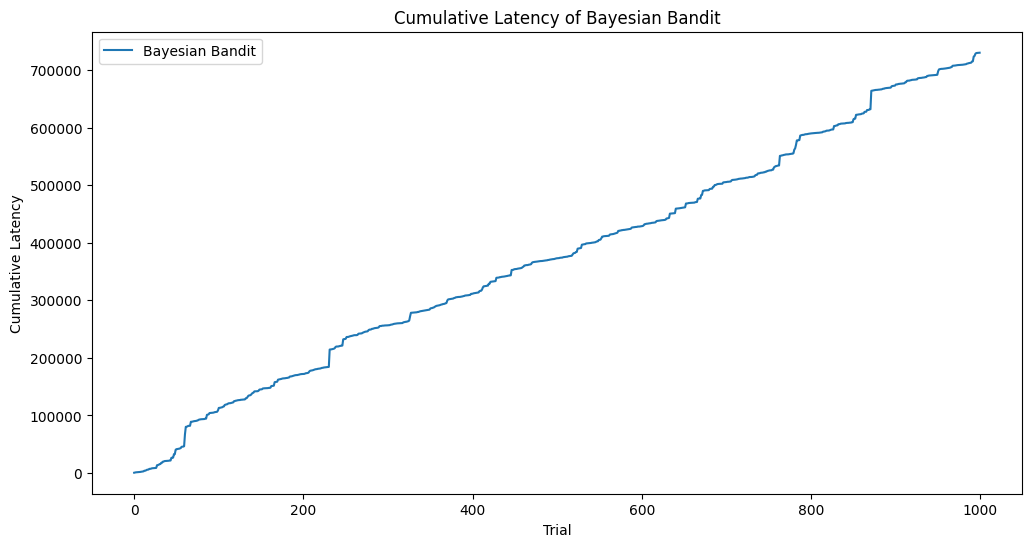

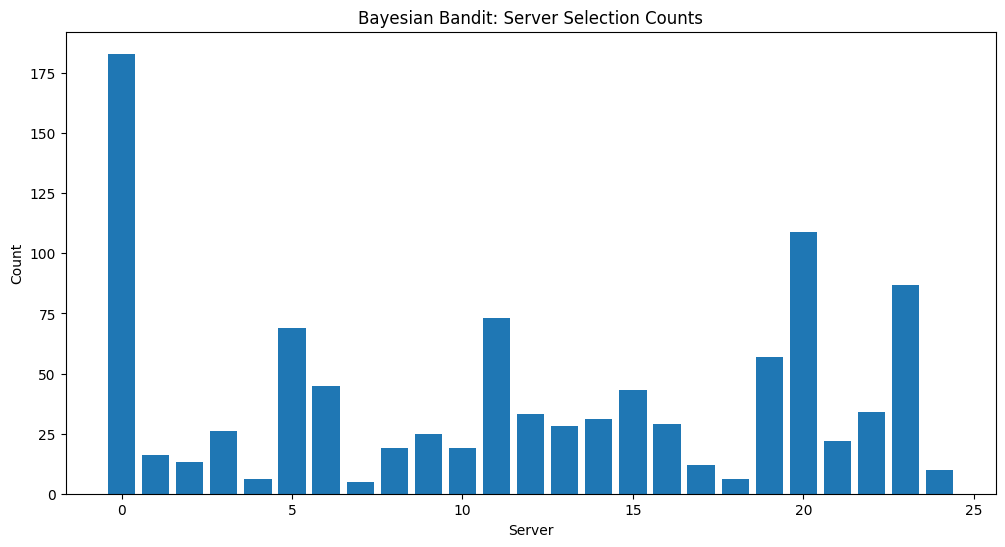

In [46]:
import numpy as np
import pandas as pd

# Bayesian Bandit using Thompson Sampling
class BayesianBandit:
    def __init__(self, num_servers):
        self.num_servers = num_servers
        # Initialize the alpha and beta parameters for each server (Beta distribution)
        self.alpha = np.ones(num_servers)
        self.beta = np.ones(num_servers)

    def select_server(self):
        # Draw a sample from Beta distribution for each server and select the one with the highest sample
        theta = np.random.beta(self.alpha, self.beta)
        return np.argmin(theta)

    def update(self, server, latency):
        # Assume lower latency is better, so update alpha for better performance
        # Update beta for bad performance (higher latency)
        if latency < np.median(latency):  # Assume lower latency is better
            self.alpha[server] += 1
        else:
            self.beta[server] += 1

# Running the Bayesian Bandit strategy
def bayesian_bandit_strategy(dataset, num_trials):
    num_servers = dataset.shape[1]
    bandit = BayesianBandit(num_servers)

    total_latencies = []
    selection_counts = np.zeros(num_servers)

    for t in range(num_trials):
        # Select the server using Thompson Sampling
        server = bandit.select_server()

        # Get the latency for the selected server
        latency = dataset.iloc[t, server]

        # Update the bandit with the observed latency
        bandit.update(server, latency)

        # Store the latency for calculating total latency
        total_latencies.append(latency)
        selection_counts[server] += 1

    return np.cumsum(total_latencies), selection_counts

# Run the Bayesian Bandit strategy
cumulative_latency_bayesian, selection_counts_bayesian = bayesian_bandit_strategy(dataset, num_trials)

# Plot cumulative latencies for Bayesian Bandit
plt.figure(figsize=(12, 6))
plt.plot(cumulative_latency_bayesian, label='Bayesian Bandit')
plt.xlabel('Trial')
plt.ylabel('Cumulative Latency')
plt.title('Cumulative Latency of Bayesian Bandit')
plt.legend()
plt.show()

# Plot selection counts for Bayesian Bandit
plt.figure(figsize=(12, 6))
plt.bar(range(25), selection_counts_bayesian)
plt.title('Bayesian Bandit: Server Selection Counts')
plt.xlabel('Server')
plt.ylabel('Count')
plt.show()
